In [2]:
import numpy as np
from scipy.stats import kstest

def FullStats(data, print_results = True):
    stat, p_value = kstest(data, 'norm')
    normally_distributed = p_value > 0.05
    if print_results:
        print(f'KS {mode} TBF Statistic: {stat}, p-value: {p_value}, n_points: {len(data)}, ND: {normally_distributed}')
    median_value = np.median(data)
    q1 = np.percentile(data, 25)  # 25th percentile
    q3 = np.percentile(data, 75)  # 75th percentile
    if print_results:
        print(f'Median: {median_value} [{q1} - {q3}]')
    mean_value = np.mean(data)
    std_dev_value = np.std(data, ddof=1)  # Using ddof=1 for sample standard deviation
    if print_results:
        print(f'Mean: {mean_value} -+ {std_dev_value}, Range [{min(data)} - {max(data)}]')
    if normally_distributed:
        return mean_value
    else:
        return median_value

## TBF Stats for each mode - Changes between episodes 1 and 5

In [4]:
# Read TBF Data of the first and last episodes
import pandas as pd
from FileToDFTools import read_tail_files, create_tail_dataframe

freq_files, move_files = read_tail_files("10 Somite Slow")
freq_data_s1 = create_tail_dataframe(freq_files, 'Slow 1', 'Rolling TBF', 1)
freq_data_s5 = create_tail_dataframe(freq_files, 'Slow 5', 'Rolling TBF', 5)

freq_files, move_files = read_tail_files("10 Somite Inter")
freq_data_i1 = create_tail_dataframe(freq_files, 'Inter 1', 'Rolling TBF', 1)
freq_data_i5 = create_tail_dataframe(freq_files, 'Inter 5', 'Rolling TBF', 5)

freq_files, move_files = read_tail_files("10 Somite Fast")
freq_data_f1 = create_tail_dataframe(freq_files, 'Fast 1', 'Rolling TBF', 1)
freq_data_f5 = create_tail_dataframe(freq_files, 'Fast 5', 'Rolling TBF', 5)


freq_data = pd.concat([freq_data_s1, freq_data_s5, freq_data_i1, freq_data_i5, freq_data_f1, freq_data_f5])
# Do stats
modes = list(freq_data['Group'].unique())
for mode in modes:
    data = freq_data[freq_data['Group']==mode]['Rolling TBF']
    FullStats(data)


KS Slow 1 TBF Statistic: 1.0, p-value: 0.0, n_points: 100, ND: False
Median: 19.825499999999998 [18.625 - 19.968]
Mean: 19.502 -+ 0.6066380279620599, Range [18.552 - 20.031]
KS Slow 5 TBF Statistic: 1.0, p-value: 0.0, n_points: 174, ND: False
Median: 34.463 [32.942 - 37.31275]
Mean: 34.77390229885057 -+ 2.5266464961309625, Range [28.612 - 38.461]
KS Inter 1 TBF Statistic: 1.0, p-value: 0.0, n_points: 210, ND: False
Median: 41.5015 [41.1445 - 42.08775]
Mean: 41.5270761904762 -+ 0.6786299411594288, Range [39.682 - 42.75]
KS Inter 5 TBF Statistic: 1.0, p-value: 0.0, n_points: 303, ND: False
Median: 58.892 [58.139 - 59.454]
Mean: 58.8056105610561 -+ 0.9336786073777477, Range [56.92 - 61.349]
KS Fast 1 TBF Statistic: 1.0, p-value: 0.0, n_points: 306, ND: False
Median: 58.892 [58.54 - 59.232749999999996]
Mean: 58.73990522875817 -+ 1.1448528436493115, Range [52.164 - 60.331]
KS Fast 5 TBF Statistic: 1.0, p-value: 0.0, n_points: 397, ND: False
Median: 78.084 [77.17 - 78.778]
Mean: 77.530979848

## Spike Frequency of each cell pool vs swim mode

### Step 1 - Read Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  CrossCorr.Const import CELL_POOL_COLOR

df = pd.read_csv("CellSpikeFreqVsMode.csv")

### Step 2 - Check for normality - the output is not reported

In [9]:
from scipy.stats import kstest

modes = list(df['Mode'].unique())
for mode in modes:
    data = df[df['Mode']==mode]['SpikeFreq']
    FullStats(data)


KS Slow TBF Statistic: 0.9826354901042749, p-value: 0.0, n_points: 2952, ND: False
Median: 38.37299 [26.75841 - 92.10526]
Mean: 79.12067149017614 -+ 100.24633176547152, Range [1.875469 - 588.3458]
KS Intermediate TBF Statistic: 0.9669114354085139, p-value: 0.0, n_points: 7455, ND: False
Median: 175.571 [48.435285 - 425.89575]
Mean: 403.0527943678069 -+ 600.363189674337, Range [1.837222 - 2982.723]
KS Fast TBF Statistic: 0.9669861077716913, p-value: 0.0, n_points: 7505, ND: False
Median: 331.0396 [169.4596 - 574.7566]
Mean: 515.5129762999334 -+ 635.6426352437178, Range [1.838235 - 3469.544]


### Steps 3 - Figures 3D-4D-5D Plot Box plots

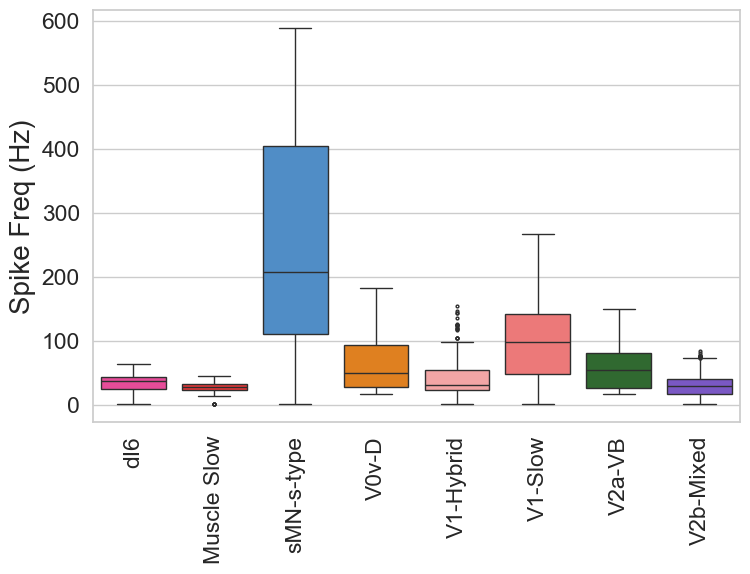

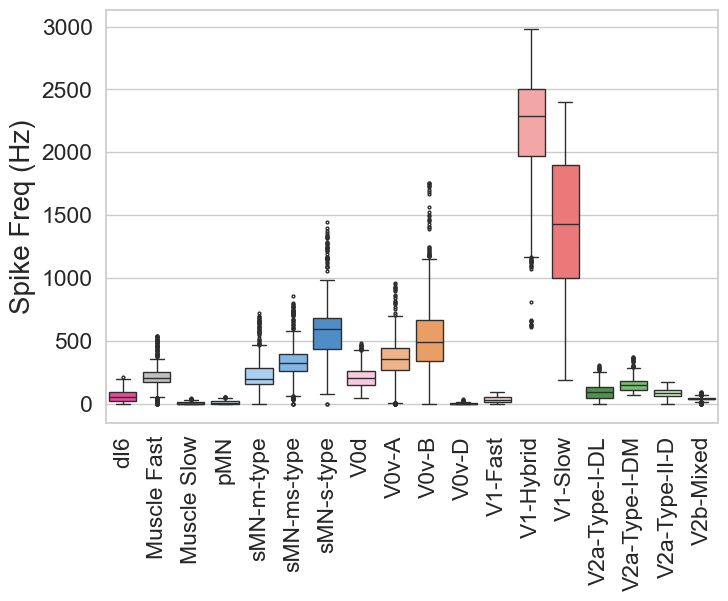

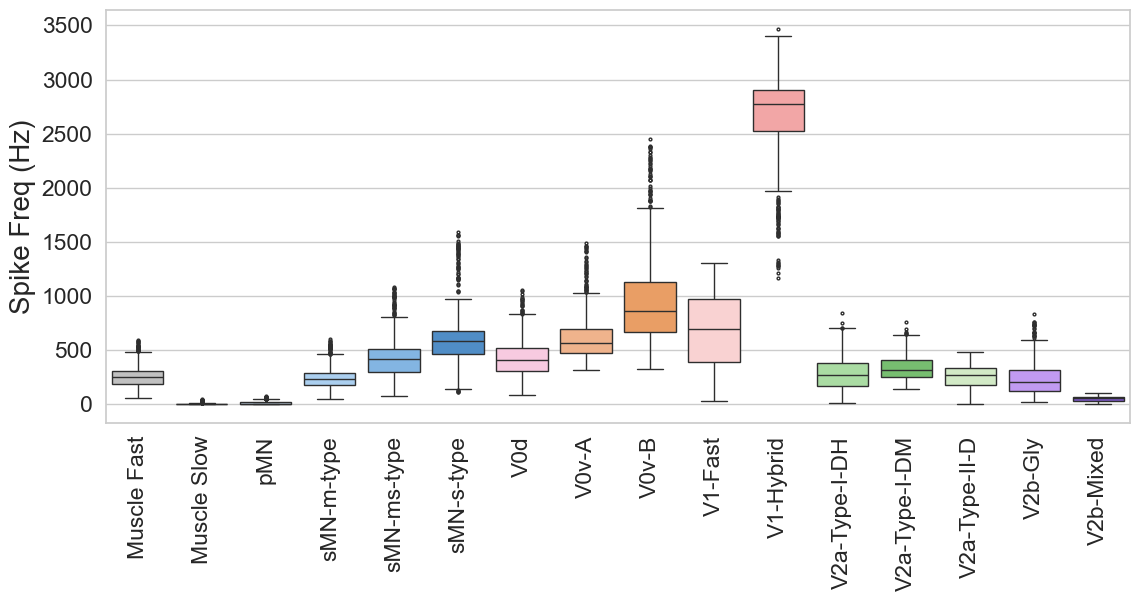

In [2]:
def plot(df, figsize):
  df = df.sort_values('Pool', key=lambda col: col.str.lower())
  plt.figure(figsize=figsize)
  sns.set_theme(style="whitegrid", font_scale=1.5)
  sns.boxplot(data=df, x='Pool', y='SpikeFreq', hue='Pool', palette=CELL_POOL_COLOR, fliersize=2)

  # Customize plot appearance
  plt.xlabel('', fontsize=14, fontweight='bold')
  plt.ylabel('Spike Freq (Hz)', fontsize=20)

  plt.tight_layout()
  plt.xticks(rotation=90)
  plt.show()

dfSlow = df[(df['Mode']=='Slow')]
dfInter = df[(df['Mode']=='Intermediate')]
dfFast = df[(df['Mode']=='Fast')]

plot(dfSlow, (8, 5))
plot(dfInter, (8, 5))
plot(dfFast, (12, 5))



In [11]:
#Spike Freq stats of each pool vs swim mode
import pandas as pd
import scipy.stats as stats

df = pd.read_csv("CellSpikeFreqVsMode.csv")
# Function to calculate median and quartiles
def calculate_stats(group):
    median = group.median()
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    n = group.count()
    return f"{median:.2f} Hz (IQR {q1:.2f}-{q3:.2f}, N = {n})"

# Group by 'Mode' and 'Pool' and apply the calculation
result = df.groupby(['Mode', 'Pool'])['SpikeFreq'].apply(calculate_stats).reset_index()

print(result)


            Mode            Pool                                  SpikeFreq
0           Fast  Muscle Fast     254.44 Hz (IQR 190.10-307.94, N = 500)
1           Fast     Muscle Slow           1.90 Hz (IQR 1.88-3.74, N = 500)
2           Fast             V0d     406.82 Hz (IQR 302.41-515.64, N = 450)
3           Fast           V0v-A     564.47 Hz (IQR 470.48-694.65, N = 500)
4           Fast           V0v-B    858.45 Hz (IQR 667.61-1128.31, N = 500)
5           Fast         V1-Fast     690.04 Hz (IQR 388.95-969.67, N = 450)
6           Fast       V1-Hybrid  2771.20 Hz (IQR 2524.66-2898.99, N = 450)
7           Fast   V2a-Type-I-DH     265.93 Hz (IQR 168.52-382.02, N = 500)
8           Fast   V2a-Type-I-DM     319.04 Hz (IQR 250.41-408.85, N = 500)
9           Fast   V2a-Type-II-D     268.44 Hz (IQR 178.69-329.38, N = 500)
10          Fast         V2b-Gly     204.72 Hz (IQR 122.58-317.01, N = 500)
11          Fast       V2b-Mixed        54.02 Hz (IQR 27.88-66.24, N = 304)
12          Fas

# Figure S3 - Change in amplitude across speeds

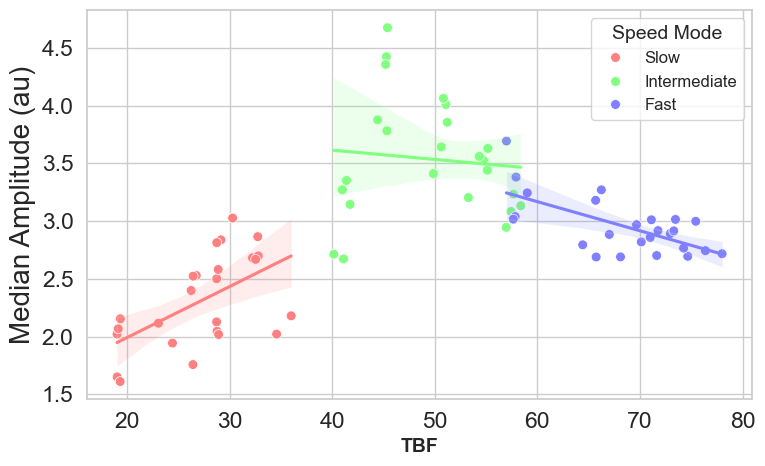

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from  CrossCorr.Const import SWIM_MODE_SUMMARY_COLOR

df_sim = pd.read_csv("SimulationEpisodes.csv")
df_sim['Speed Mode'] = df_sim['Name'].apply(lambda x: 'Slow' if 'slow' in x.lower() else 'Intermediate' if 'intermediate' in x.lower() else 'Fast' if 'fast' in x.lower() else 'Unknown')
# Set the theme for the plot
sns.set_theme(style="whitegrid", font_scale=1.5)

# Create the plot
plt.figure(figsize=(8, 5))

# Plot the data points and regression lines
sns.scatterplot(data=df_sim, x='TBF', y='MedianAmplitude', hue='Speed Mode', palette=SWIM_MODE_SUMMARY_COLOR, s=50)
sns.regplot(data=df_sim[df_sim['Speed Mode'] == 'Slow'], x='TBF', y='MedianAmplitude', scatter=False, color=SWIM_MODE_SUMMARY_COLOR['Slow'])
sns.regplot(data=df_sim[df_sim['Speed Mode'] == 'Intermediate'], x='TBF', y='MedianAmplitude', scatter=False, color=SWIM_MODE_SUMMARY_COLOR['Intermediate'])
sns.regplot(data=df_sim[df_sim['Speed Mode'] == 'Fast'], x='TBF', y='MedianAmplitude', scatter=False, color=SWIM_MODE_SUMMARY_COLOR['Fast'])

# Customize plot appearance
plt.xlabel('TBF', fontsize=14, fontweight='bold')
plt.ylabel('Median Amplitude (au)', fontsize=20)
plt.legend(title='Speed Mode', fontsize=12, title_fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()